#  요구사항 분석 및 문제 정의

- 간단한 EDA와 관련된 함수를 학습
- BMI 데이터를 확인해 보고 잘 분류가 될 수 있는지 시각화
- KNN의 개념에 대해 학습
- KNN을 이용해서 학습
- 머신러닝 프로세스에 대해 학습

# 데이터 수집

In [34]:
import pandas as pd

bmi = pd.read_csv("./data/bmi_500.csv")


# EDA (탐색적 데이터 분석)

In [35]:
# 처음부터 일부 데이터를 확인
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [5]:
# 끝에서부터 일부 데이터를 확인
# 괄호안에 숫자를 입력하면 해당 숫자만큼 출력
bmi.tail(9)

,Gender,Height,Weight,Label
491,Female,146,147,Extreme Obesity
492,Female,198,50,Extremely Weak
493,Female,170,53,Weak
494,Male,152,98,Extreme Obesity
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity
499,Male,173,131,Extreme Obesity


In [6]:
# 데이터의 정보를 출력하는 함수
# 데이터의 수, 컬럼의 수, 컬럼의 특성/데이터타입 - 결측치 확인
# Dtype : object(범주형), int/float(수치형)
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [10]:
# 범주형 컬럼에서 클래스의 목록을 출력하는 함수 #중복되는 것을 제거하고
print(bmi["Gender"].unique())

['Male' 'Female']


In [11]:
# 범주형 컬럼의클래스별 갯수를 확인
# 데이터가 한쪽으로 치우쳐 있는 지 확인
print(bmi["Gender"].value_counts())

Female    255
Male      245
Name: Gender, dtype: int64


In [13]:
# 수치형 데이터의 편향(치우침)을 확인하는 함수
# 0이면 정규분표
# 양수이면 왼쪽으로 치우친 데이터, 음수이면 오른쪽으로 치우친 데이터를 표시
print(bmi["Height"].skew())
print(bmi["Weight"].skew())

-0.12191368980139153
-0.037692236922098034


In [14]:
# 데이터의 간단한 기술통계를 보여주는 함수
# 데이터의 개수, 평균, 표준편차, 최소/25%/중간값/75%/최대값
# 결측치, 이상치, 편향(치우침정도)
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


## BMI 데이터가 분류가 될 수 있는 데이터인지 확인

In [17]:
# matplotlib : 파이썬 그래프 시각화도구 
# searborn : matplotlib에 고급 시각화 도구를 제공하는 라이브러리
import matplotlib.pyplot as plt

# scatter : 산포도를 그리는 함수(2차원 좌표에 점을 찍는 함수)
# x 좌표 : Weight, y 좌표 : Height
def myScatter(label, color):
    # 파라미터로 넘어온 라벨의 해당 값들을 저장 - 불리언 익덱싱
    tmp = bmi[bmi["Label"]== label]
    
    # 입력한 라벨값만 산포도를 그림
    # scatter(x좌표, y좌표, 색상, 라벨)
    plt.scatter(tmp["Weight"], tmp["Height"],
                c = color, label = label)

In [16]:
bmi["Label"].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

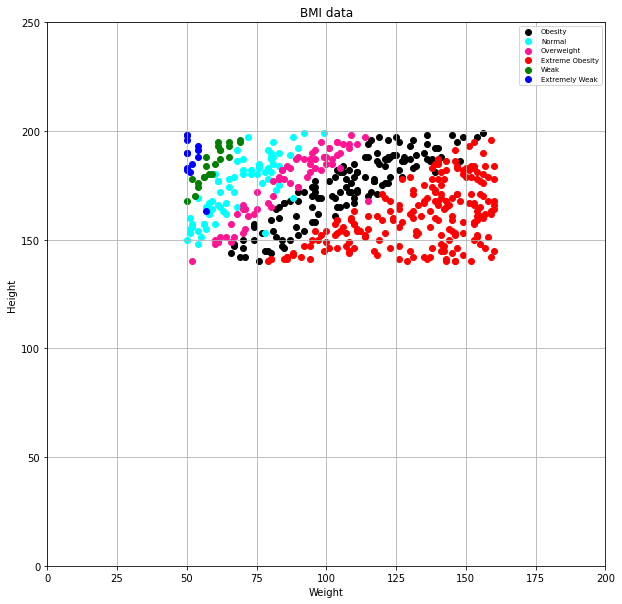

In [50]:
# 그래프의 크기 설정
plt.figure(figsize=(10,10))


myScatter("Obesity", "black")
myScatter("Normal", "cyan")
myScatter("Overweight", "deeppink")
myScatter("Extreme Obesity", "red")
myScatter("Weak", "green")
myScatter("Extremely Weak", "b")
# 분류가 잘된 데이터라 구분이 잘감



# 범례추가(loc : 범례의 위치)
# loc를 써주지 않으면 알아서 데이터가 가장 작게 분포된 위치에 표시
plt.legend(loc="upper right", prop={'size':7})

# x축 라벨 표시 (기본적으로 한글을 지원하지 않음)
plt.xlabel("Weight")

# y축 라벨 표시
plt.ylabel("Height")

# x축 눈금의 범위
plt.xlim(0,200)

# y축 눈금의 범위
plt.ylim(0,250)

# 제목 표시
plt.title("BMI data")

#격자표시
plt.grid()

## 학습 데이터로 변환

- 특성데이터와 라벨데이터로 분리
- 훈련데이터와 테스트데이터로 분리

In [51]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [49]:
#특성데이터와 라벨데이터로 분리
bmi_X = bmi.iloc[:, 0:3]
# bmi_X = bmi.loc[:, "Height":"Weight"]
bmi_y = bmi.iloc[:, 3]
# bmi_y = bmi.loc[:, "Label"]
print(bmi_X.shape)
print(bmi_y.shape)

(500, 3)
(500,)


In [50]:
#훈련데이터와 테스트데이터로 분리 (훈련 70%, 테스트 30%)
X_train = bmi_X[:350]
# X_train = bmi_X.iloc[:350, :]
y_train = bmi_y[:350]
# y_train = bmi_y.iloc[:350]
X_test = bmi_X[350:]
# X_test = bmi_X.iloc[350:, :]
y_test = bmi_y[350:]
# y_test = bmi_y.iloc[350:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 3)
(350,)
(150, 3)
(150,)


In [67]:
print(X_test)
y_test

     Height  Weight
350     184      83
351     197      88
352     160      51
353     184     153
354     190      50
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[150 rows x 2 columns]


350             Normal
351             Normal
352             Normal
353    Extreme Obesity
354     Extremely Weak
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 150, dtype: object

In [68]:
type(X_train)

pandas.core.frame.DataFrame

In [70]:
y_test

350             Normal
351             Normal
352             Normal
353    Extreme Obesity
354     Extremely Weak
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 150, dtype: object

# KNN으로 BMI 데이터 학습

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors : 이웃의 수  # 이웃의 수는 한쪽으로 치우는 값을 확인하기 위해서 대부분 홀수값을 입력한다.
# 이웃의 수가 적으면 과대적합
# 이웃의 수가 많으면 과소적합
# Hyper Parameter Tuning : 적당한 이웃의 수를 결정하는 것
knn_model = KNeighborsClassifier(n_neighbors=3)
# 훈련은 훈련데이터로 기준을 잡아야 하므로 훈련데이터와 테스트데이터를 구분해서 한다.
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
# 정확도 계산
# 훈련정확도와 테스트정확도가 모두 낮으면 -> 과소적합
# 훈련정확도 보다 테스트정확도가 높으면 -> 과소적합
# 훈련정확도와 테스트정확도가 크게 차이나면 -> 과대적합
# 일반화모델 : 훈련정확도가 테스트 정확도보닥 약간 높은 모델
print("훈련 정확도 : ", knn_model.score(X_train, y_train))
print("테스트 정확도 : ", knn_model.score(X_test, y_test))

훈련 정확도 :  0.9342857142857143
테스트 정확도 :  0.9


- 이웃의 수가 감소하면 과대적합이 생김

In [7]:
knn_model2 = KNeighborsClassifier(n_neighbors=1)
knn_model2.fit(X_train, y_train)

print("훈련 정확도 : ", knn_model2.score(X_train, y_train))
print("테스트 정확도 : ", knn_model2.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8933333333333333


- 이웃의 수가 증가하면 과소적합이 생김

In [8]:
knn_model3 = KNeighborsClassifier(n_neighbors=10)
knn_model3.fit(X_train, y_train)

print("훈련 정확도 : ", knn_model3.score(X_train, y_train))
print("테스트 정확도 : ", knn_model3.score(X_test, y_test))

훈련 정확도 :  0.9085714285714286
테스트 정확도 :  0.94


- 일반화된 모델을 찾아보자 - 하이퍼파라미터 튜닝 (Hyper Parameter Tuning)

In [19]:
# 이웃의 수 마다의 정확도
train_acc = []
test_acc = []

#  사용할 이웃의 범위 값들을 정의
neighbor =range(1, 20)

for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    # 이웃의 수마다의 훈련데이터의 정확도와 테스트데이터의 정확도를 리스트에 저장
    train_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))

In [47]:
train_acc = []
test_acc = []

#  사용할 이웃의 범위 값들을 정의
neighbor =range(1, 20)

for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    # 이웃의 수마다의 훈련데이터의 정확도와 테스트데이터의 정확도를 리스트에 저장
    train_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))

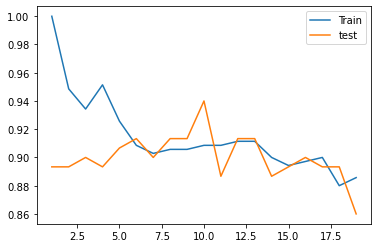

In [21]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(neighbor, train_acc, label="Train")
plt.plot(neighbor, test_acc, label="test")
plt.legend()
plt.show()

# 훈련데이터와 테스트데이터에서 이웃수에 따른 것은 확률이 높은 것이 좋다

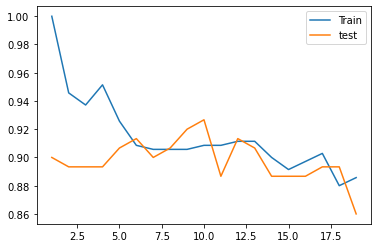

In [51]:
train_acc = []
test_acc = []

#  사용할 이웃의 범위 값들을 정의
neighbor =range(1, 20)

for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    # 이웃의 수마다의 훈련데이터의 정확도와 테스트데이터의 정확도를 리스트에 저장
    train_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))
import matplotlib.pyplot as plt

plt.plot(neighbor, train_acc, label="Train")
plt.plot(neighbor, test_acc, label="test")
plt.legend()
plt.show()

- 특성 수를 증가 시켜서 과소 적합을 줄여보자

In [28]:
# Gender 컬럼에서 Male-> 0으로 Female -> 1로 변경
#replace 함수
bmi['Gender'].replace("Male",1).replace("Female",0)

0      1
1      1
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    1
499    1
Name: Gender, Length: 500, dtype: int64

In [36]:
#map 함수
bmi["Gender"] = bmi["Gender"].map({"Male":0, "Female":1})

bmi.head()

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight


- 특성들끼리 각각 곱해서 새로운 특성을 추가

In [54]:
X_train2 = X_train.copy()

# 컬럼의 이름들을 가져온다
col = X_train2.columns

# 두개의 특성이 있다면 A B A*A A*B B*B B*A 처럼 특성이 만들어진다
for i in range(col.size):
    for j in range(i, col.size):
        X_train2[col[i] + "x" + col[j]] = X_train2[col[i]] * X_train2[col[j]]
        
X_train2.head()

plt.plot()

,Gender,Height,Weight,GenderxGender,GenderxHeight,GenderxWeight,HeightxHeight,HeightxWeight,WeightxWeight
0,0,174,96,0,0,0,30276,16704,9216
1,0,189,87,0,0,0,35721,16443,7569
2,1,185,110,1,185,110,34225,20350,12100
3,1,195,104,1,195,104,38025,20280,10816
4,0,149,61,0,0,0,22201,9089,3721


In [56]:
X_test2 = X_test.copy()

# 컬럼의 이름들을 가져온다
col = X_test2.columns

# 두개의 특성이 있다면 A B A*A A*B B*B B*A 처럼 특성이 만들어진다
for i in range(col.size):
    for j in range(i, col.size):
        X_test2[col[i] + "x" + col[j]] = X_test2[col[i]] * X_test2[col[j]]
X_test2.head()

,Gender,Height,Weight,GenderxGender,GenderxHeight,GenderxWeight,HeightxHeight,HeightxWeight,WeightxWeight
350,0,184,83,0,0,0,33856,15272,6889
351,0,197,88,0,0,0,38809,17336,7744
352,1,160,51,1,160,51,25600,8160,2601
353,0,184,153,0,0,0,33856,28152,23409
354,0,190,50,0,0,0,36100,9500,2500


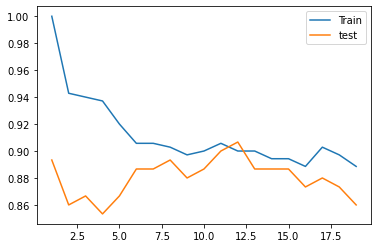

In [57]:
train_acc = []
test_acc = []

#  사용할 이웃의 범위 값들을 정의
neighbor =range(1, 20)

for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train2, y_train)
    
    # 이웃의 수마다의 훈련데이터의 정확도와 테스트데이터의 정확도를 리스트에 저장
    train_acc.append(knn_model.score(X_train2, y_train))
    test_acc.append(knn_model.score(X_test2, y_test))
import matplotlib.pyplot as plt

plt.plot(neighbor, train_acc, label="Train")
plt.plot(neighbor, test_acc, label="test")
plt.legend()
plt.show()

# 보스턴집값 데이터를 이용한 KNN 회귀

## 문제 정의

- 보스턴 집값 데이터에서 어떤 특성이 집값에 얼마만큼 영향을 주는지 분석
- 다중 공선성 문제에 대한 이해
- KNN을 이용한 회귀분석

## 데이터 수집

In [2]:
# sklearn에서는 교육용 데이터셋으로 딕셔너리형태로 데이터를 제공
from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()
# data : 특성 데이터가 
# target : 라벨데이터
# feature_names : 컬럼명
# DESCR : 컬럼에 대한 설명

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## 데이터 시각화 및 분석

- 딕셔너리를 데이터프레임으로 변환
- 특성과 라벨 간의 상관관계 분석
- 분석 결과를 히트맵으로 시각화

In [4]:
import pandas as pd

df_feature = pd.DataFrame(boston["data"], columns=boston["feature_names"])

df_feature.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df_feature.info()  # 결측치 확인 및 수치형 데이터인 것을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df_feature.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
df_label = pd.DataFrame(boston["target"], columns=["price"])

df_label.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
# 특성 데이터와 라벨 데이터를 하나의 데이터프레임으로 병합 -> concat()
# axis=1 : 열 방향으로 병합
# pandas 의 재구조화 함수들이 많이 쓰인다.
df_boston = pd.concat([df_feature, df_label], axis=1)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# 특성과 라벨의 상관과계 분석 , 피어슨 상관관계를 사용한다.
df_boston.corr()

# 양의 값 : 집 값을 올리는 정도 
# 음의 값 : 집 값을 떨어뜨리는 정도
# 0에 가까운 값 : 집 값과 관련이 없는 특성 -> 삭제, 처리 후 에 사용

# 다중공선성
#      - 특성간의 공선성(데이터의 유사성) 문제
#          - 특성과 특성 간의 상관관계가 90% 이상인것 
#          - 특성과 라벨 간의 상관관계가 더 낮은 특성을 삭제하거나 처리 (처리하지않으면 여향을 중복해서 준다)
#      - 특성과 라벨의 공선성(데이터의 유사성) 문제
#          - 특성과 라벨간의 상관관계가 90% 이상인 것
#          - 해당 특성을 삭제하거나 처리

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- train_test_split : 훈련데이터와 테스트데이터를 분리해 주는 함수
  - 훈련 75%, 테스트 25%로 분리

In [14]:
from sklearn.model_selection import train_test_split

# random_state = : 랜덤 시드를 설정 (항상 같은 데이터셋을 사용하기 위한것)(랜덤시드를 설정하지 않으면 실행할때마다 시트값이 달라진다)
X_train, X_test, y_train, y_test = train_test_split(boston["data"],          # train_test_split(특성 값, 라벨값)
                                                    boston["target"],
                                                    random_state= 7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

# 모델 선택 및 훈련

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_model4 = KNeighborsRegressor(n_neighbors=5)
knn_model4.fit(X_train, y_train)

KNeighborsRegressor()

In [17]:
# 평가 (회귀분석에서는 평가도구로 오차를 사용)
# 오차가 작으면 좋은모델 ?
#     1번 오델의 오차 : 10 -100 => -90
#     2번 모델의 오차 : 2, 3 => 5
#   -> 음수오차로 인해서 직접 비교하기 어려운 문제 발생
#   -> 음수를 양수로 변경하는 방법 : 
#           제곱 -> 평균제곱오차(mean Squared Error : MSE)
#           절대값 -> 평균절대값오차(Mean Absolute Error : MAE)
#  MSE를 더 사용하는 이유 : 제곱하기때문에 좋은 모델과 나쁜 모델을 구분하기 쉬움
from sklearn.metrics import mean_squared_error

pred_train = knn_model4.predict(X_train)
pred_test = knn_model4.predict(X_test)

print("훈련 오차 : ", mean_squared_error(pred_train, y_train))
print("테스트 오차 : ", mean_squared_error(pred_test, y_test))

훈련 오차 :  25.2812073878628
테스트 오차 :  40.725077165354335


In [18]:
# MSE는 제곱을 한 값이라 원래 값이 아님 -> 제곱근 사용
import numpy as np

print("훈련 오차 : ",np.sqrt(mean_squared_error(pred_train, y_train)))
print("테스트 오차 : ", np.sqrt(mean_squared_error(pred_test, y_test)))

훈련 오차 :  5.028042102833149
테스트 오차 :  6.381620261763805
